# Task for session2_cont and session3: 
## Edge-Preserving Denoising Filters & Feature Matching

**Instructions:**  
**please dont use .py to solve this task, just use tasks2.ipynb and edit the cells.**
- After forking the [SkyXperts-Vision-Course repo](https://github.com/ffathy-tdx/SkyXperts-Vision-Course) on GitHub. (you should have already dont this in the last session & uploaded task1)
- Go to your fork of the repo on GitHub.
- At the top, look for a yellow box that says “This branch is X commits behind…”
- Click the Sync fork or Update branch button.
The new task will show up in your tasks/ folder.  
- Upload your task to your forked repo (like you've done with task1 before)
---

## 1. DoG, LoG, and Edge-Preserving Denoising Filters

**Task:**
- Briefly read the descriptions below, then apply each filter to `'sample.jpg'` (or any test image you choose).
- Compare the results visually and write your observations.

**Background:**
- **DoG (Difference of Gaussian):** Used for edge detection by subtracting two blurred versions of the image (with different Gaussian sigmas).
- **LoG (Laplacian of Gaussian):** Uses a single Gaussian blur followed by Laplacian to highlight regions of rapid intensity change (edges).
- **Edge-Preserving Denoising (Bilateral Filter):** Smooths image while preserving edges (unlike simple Gaussian blur). You've already used this at the end of task1.

---

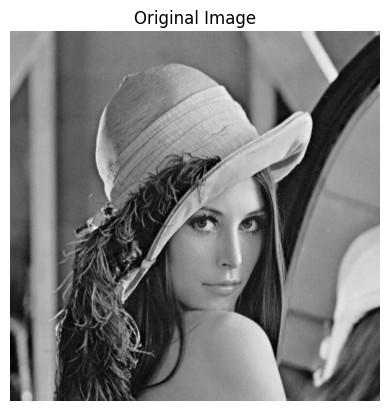

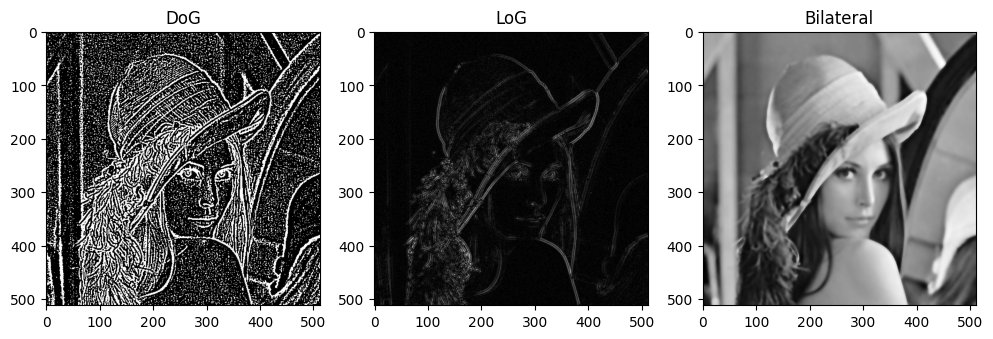

In [2]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('sample.jpg', 0) 
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()

# TODO: Apply DoG
g1 = cv2.GaussianBlur(img, (5,5), 1)  
g2 = cv2.GaussianBlur(img, (5,5), 2)   
dog = g1 - g2
# TODO: Apply LoG
blurred = cv2.GaussianBlur(img, (5,5), 0)
log = cv2.Laplacian(blurred, cv2.CV_64F)
log = cv2.convertScaleAbs(log)  

# TODO: Apply bilateral (edge-preserving) filter
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Show all results for comparison
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(dog, cmap='gray')
plt.title("DoG")

plt.subplot(1,3,2)
plt.imshow(log, cmap='gray')
plt.title("LoG")

plt.subplot(1,3,3)
plt.imshow(bilateral, cmap='gray')
plt.title("Bilateral")


plt.show()

**Q1: What differences do you observe between DoG, LoG, and the edge-preserving filter?**
- DoG=> strong edges with lots of fine details, but this also makes it noisy
- LoG=> smoother than DoG but in return may lose some fine details + clearly distinguishes edges
- Bilater Filtering=> smoothes out the flat regions while keeping sharp edges so it produces cleaner images but not edge maps

## 2. Keypoints & Descriptors: SIFT vs. ORB

**Task:**
- Detect and plot keypoints on `'sample.jpg'` using SIFT and ORB.
- Compare the number and distribution of detected keypoints.

**Background:**
- **Keypoints:** Distinctive image points (corners/blobs) useful for matching.
- **Descriptors:** Vectors that describe local patches around keypoints for comparison/matching.

---

Number of SIFT keypoints: 990
Number of ORB keypoints: 500


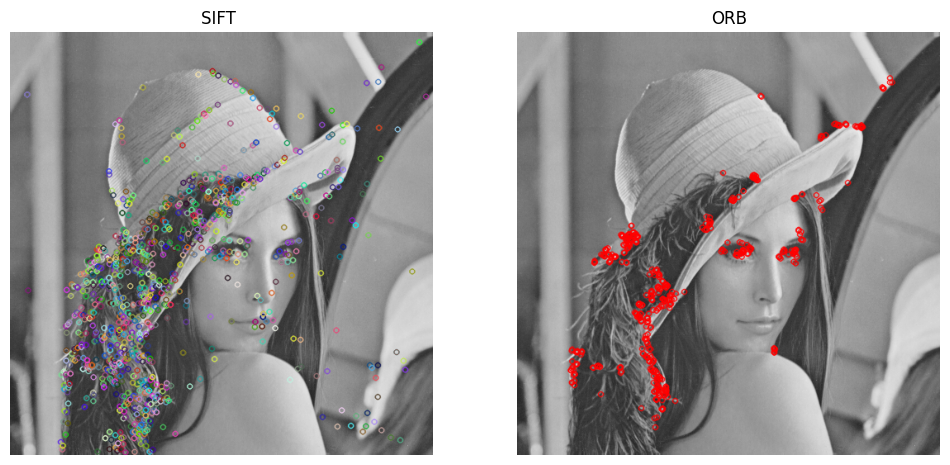

In [3]:
# Detect and plot SIFT keypoints
sift = cv2.SIFT_create()
sift_kp = sift.detect(img, None)
sift_img = cv2.drawKeypoints(img, sift_kp,None)

# Detect and plot ORB keypoints
orb = cv2.ORB_create()
orb = cv2.ORB_create()
orb_kp = orb.detect(img, None)

orb_img = cv2.drawKeypoints(img, orb_kp, None, color=(255,0,0), flags=0)


# TODO: Count and compare number of keypoints for SIFT and ORB

sift_count = len(sift_kp)
orb_count = len(orb_kp)

print(f"Number of SIFT keypoints: {sift_count}")
print(f"Number of ORB keypoints: {orb_count}")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(sift_img)
plt.title(f"SIFT ")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(orb_img)
plt.title(f"ORB")
plt.axis('off')

plt.show()

**Q2: How do the number and distribution of keypoints differ between SIFT and ORB?**

- SIFT=> detects more, denser keypoints across scales and textures
- ORB=> finds fewer keypoints mostly on strong corners and edges

## 3. Feature Matching with Descriptors

**Task:**
- Load a second image (e.g., `'sample2.jpg'`).
- Detect keypoints/descriptors using SIFT or ORB in both images.
- Match the features between the images using BFMatcher or FLANN.
- Plot the top matches.

**Background:**
- **Feature matching** helps recognize objects/scenes or estimate image transformations.

---

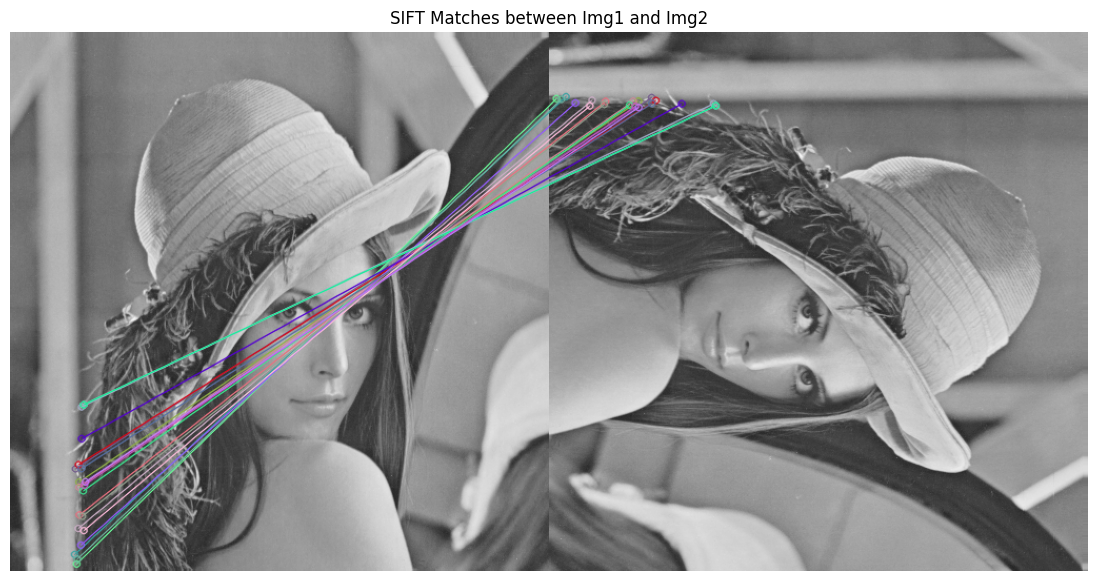

In [6]:
# Load second image
img1 = cv2.imread('sample.jpg', 0) 
img2 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

# Detect SIFT keypoints/descriptors in both images
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)


plt.figure(figsize=(15,7))
plt.imshow(result)
plt.axis('off')
plt.title("SIFT Matches between Img1 and Img2")
plt.show()


# bonus TODO: Try with ORB or FLANN if you like

**Q3: What do you notice about the feature matches? Are there any mismatches or errors? How might you improve the matching process?**

some matches are correct,but many are mismatches.we can improve accuracy using KNN with ratio test.

**Bonus Task (Optional, for extra credit):**
- Try using different image preprocessing steps *before* edge detection or feature extraction.
    - For example:
        - Add noise to your image (e.g., Gaussian noise, salt-and-pepper noise).
        - Apply a sharpening filter to your image.
    - Then, run DoG, LoG, or any edge-preserving filter and observe the changes.
- **What to do:**
    - Show the results (images/plots) for at least one type of preprocessing + edge detection.
    - Briefly explain:
        - How does noise affect edge maps or keypoints?
        - Does sharpening make features easier or harder to detect/match?

**You can add your code and observations in the cells below.**


In [ ]:
# Write your code here

_What are your observations?_
write them here

## 4. Reflection (Optional)

- What was the most challenging or interesting part of this task for you?
- Any feedback or thoughts?

_Write your reflection here._